# **ÁRBOL DE DECISIÓN**

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
mainpath = "/content/"
filename = "bankmod.csv"
fullpath = os.path.join(mainpath, filename)

In [2]:
data = pd.read_csv(fullpath,sep=",")

In [3]:
data

,age,job,marital,month,dayofweek,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,target
0,56,housemaid,married,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,may,mon,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10648,73,retired,married,nov,fri,0,-1.1,94.767,-50.8,1.028,4963.6,1
10649,46,blue-collar,married,nov,fri,0,-1.1,94.767,-50.8,1.028,4963.6,0
10650,56,retired,married,nov,fri,0,-1.1,94.767,-50.8,1.028,4963.6,0
10651,44,technician,married,nov,fri,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [4]:
data.shape

(10653, 12)

###Estandarización de las variables númericas

In [5]:
from sklearn.preprocessing import StandardScaler
data[['age', 'previous','empvarrate','conspriceidx',"consconfidx","euribor3m","nremployed"]]=StandardScaler().fit_transform(data[['age', 'previous','empvarrate','conspriceidx',"consconfidx","euribor3m","nremployed"]])

### Conversión de las variables categóricas a númericas(categorización)

In [6]:
data.job=data.job.astype("category").cat.codes
data.marital=data.marital.astype("category").cat.codes
data.month=data.month.astype("category").cat.codes
data.dayofweek=data.dayofweek.astype("category").cat.codes
 

In [7]:
data

,age,job,marital,month,dayofweek,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,target
0,1.323661,3,1,6,1,-0.48371,1.221893,1.415527,0.934807,1.107212,0.610008,0
1,1.411120,7,1,6,1,-0.48371,1.221893,1.415527,0.934807,1.107212,0.610008,0
2,-0.338054,7,1,6,1,-0.48371,1.221893,1.415527,0.934807,1.107212,0.610008,0
3,-0.075678,0,1,6,1,-0.48371,1.221893,1.415527,0.934807,1.107212,0.610008,0
4,1.323661,7,1,6,1,-0.48371,1.221893,1.415527,0.934807,1.107212,0.610008,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10648,2.810458,5,1,7,0,-0.48371,-0.324199,2.995309,-1.915619,-1.167632,-2.182618,1
10649,0.449074,1,1,7,0,-0.48371,-0.324199,2.995309,-1.915619,-1.167632,-2.182618,0
10650,1.323661,5,1,7,0,-0.48371,-0.324199,2.995309,-1.915619,-1.167632,-2.182618,0
10651,0.274157,9,1,7,0,-0.48371,-0.324199,2.995309,-1.915619,-1.167632,-2.182618,1


In [8]:
bank_data_vars = data.columns.values.tolist()
Y = ['target']
predictors = [v for v in bank_data_vars if v not in Y]

In [9]:
predictors

['age',
 'job',
 'marital',
 'month',
 'dayofweek',
 'previous',
 'empvarrate',
 'conspriceidx',
 'consconfidx',
 'euribor3m',
 'nremployed']

In [10]:
X = data[predictors]
Y = data["target"]

###Construcción del árbol

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [13]:
from sklearn.model_selection import GridSearchCV
dept = [1,2,3,4]
min_samples =  [5, 10,20, 100, 500,1000]
param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(X_train,Y_train)
print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 100
optimal max_depth 4


In [14]:
import sklearn.metrics as metrics
clf = DecisionTreeClassifier(max_depth = 4, min_samples_split = 100)
clf.fit(X_train,Y_train)
pred_test =clf.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, pred_test)
pred_train = clf.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(Y_train,pred_train)

###Visualización del árbol de decisión

In [15]:
from sklearn.tree import export_graphviz

In [16]:
with open("/content/tree.dot", "w") as dotfile:
    export_graphviz(clf, out_file=dotfile, feature_names=predictors,filled=True)
    dotfile.close()

In [17]:
import os
from graphviz import Source
file = open("/content/tree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="euribor3m <= -0.945\\ngini = 0.492\\nsamples = 7457\\nvalue = [4205, 3252]", fillcolor="#f9e2d2"] ;\n1 [label="conspriceidx <= 2.826\\ngini = 0.097\\nsamples = 2103\\nvalue = [107, 1996]", fillcolor="#44a2e6"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="conspriceidx <= 1.512\\ngini = 0.052\\nsamples = 2008\\nvalue = [54, 1954]", fillcolor="#3ea0e6"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 1588\\nvalue = [0, 1588]", fillcolor="#399de5"] ;\n2 -> 3 ;\n4 [label="euribor3m <= -1.336\\ngini = 0.224\\nsamples = 420\\nvalue = [54, 366]", fillcolor="#56abe9"] ;\n2 -> 4 ;\n5 [label="gini = 0.5\\nsamples = 94\\nvalue = [47, 47]", fillcolor="#ffffff"] ;\n4 -> 5 ;\n6 [label="gini = 0.042\\nsamples = 326\\nvalue = [7, 319]", fillcolor="#3d9fe6"] ;\n4 -> 6 ;\n7 [label="gini = 0.493\\nsamples = 95\\nvalue = [53, 42]", fillcolor="#fae5d6"] ;\n1 -> 7 ;\n8 [label="conspriceidx <= 0.653\\ngi

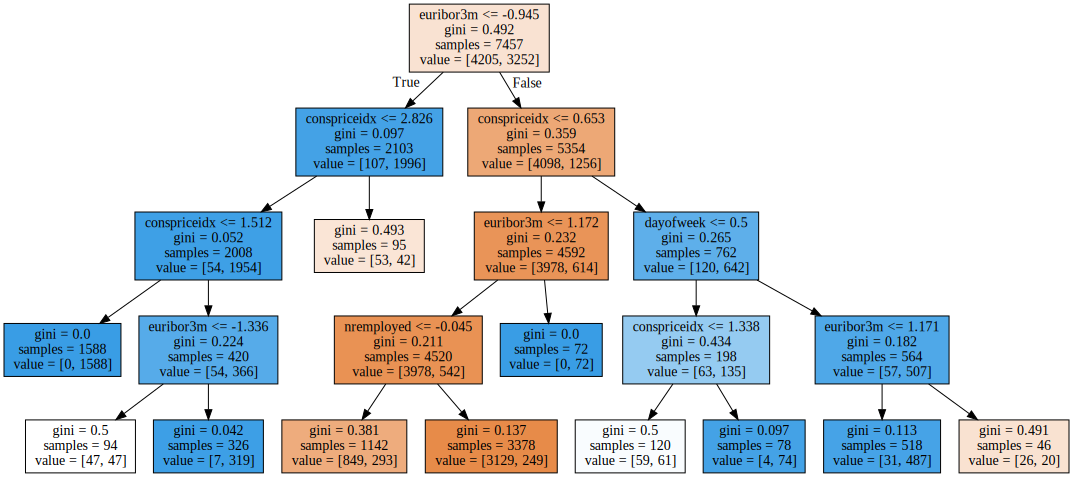

In [18]:
Source(text)

## Cross Validation para la poda

In [19]:
X = data[predictors]
Y = data["target"]

In [20]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=True, random_state=0)

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
scores

array([0.90150094, 0.90337711, 0.90900563, 0.88262911, 0.89014085,
       0.91455399, 0.90516432, 0.89953052, 0.89483568, 0.90046948])

In [22]:
score = np.mean(scores)
score

0.9001207620960283

In [23]:
dt5 = DecisionTreeClassifier(min_samples_split = 100,max_depth=4)

# Fit the decision tree classifier
dt5.fit(X_train, Y_train)

fi = dt5.feature_importances_

l = len(predictors)
for i in range(0,len(predictors)):
    print('{:.<20} {:3}'.format(predictors[i],fi[i]))

age................. 0.0
job................. 0.0
marital............. 0.0
month............... 0.0
dayofweek........... 0.005494616320935171
previous............ 0.0
empvarrate.......... 0.0
conspriceidx........ 0.2931528167428063
consconfidx......... 0.0
euribor3m........... 0.6786561010753166
nremployed.......... 0.022696465860941876


## Matriz de Confusión y curva ROC

In [24]:
preds = clf.predict(X_test)

In [25]:
from sklearn.metrics import roc_auc_score
print("AUC on Test data is " +str(roc_auc_score(Y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(Y_train,pred_train)))

AUC on Test data is 0.9354464137605429
AUC on Train data is 0.9352902375634934


In [26]:
probs = clf.predict_proba(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, preds)
print("\nMatriz de confusión: \n{}".format(cm))
 
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(Y_test, preds)))


Matriz de confusión: 
[[1765   47]
 [ 275 1109]]

Accuracy score: 
0.8992490613266583


In [28]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[0][1]
FP=cm[1][0]

In [29]:
sens = TP/(TP+FN)
sens

0.9593425605536332

In [30]:
espc_1 = TN/(TN+FP)
espc_1

0.8651960784313726

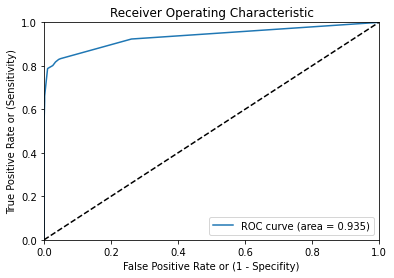

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
# Compute fpr, tpr, thresholds and roc auc
probs1 = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,probs1)
roc_auc = roc_auc_score(Y_test,probs1)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [32]:
clf.predict_proba(X_test)

array([[0.92628774, 0.07371226],
       [0.49166667, 0.50833333],
       [0.92628774, 0.07371226],
       ...,
       [0.74343257, 0.25656743],
       [0.        , 1.        ],
       [0.92628774, 0.07371226]])

## Resumen de los predictores de clasificación

In [33]:
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(Y_test, preds))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1812
           1       0.96      0.80      0.87      1384

    accuracy                           0.90      3196
   macro avg       0.91      0.89      0.89      3196
weighted avg       0.91      0.90      0.90      3196





# **RANDOM FOREST**

In [34]:
from sklearn.ensemble import RandomForestClassifier
clfrandom = RandomForestClassifier(n_estimators=100)
clfrandom.fit(X_train,Y_train)
pred_test =clfrandom.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, pred_test)
pred_train = clfrandom.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(Y_train,pred_train)

## Matriz de Confusión y curva ROC

In [35]:
forest_predict = clfrandom.predict(X_test)

In [36]:
print("AUC on Test data is " +str(roc_auc_score(Y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(Y_train,pred_train)))

AUC on Test data is 0.956318226913703
AUC on Train data is 0.99803168780796


In [37]:
probs = clfrandom.predict_proba(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, forest_predict)
print("\nMatriz de confusión: \n{}".format(cm))
 
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(Y_test,forest_predict)))


Matriz de confusión: 
[[1705  107]
 [ 162 1222]]

Accuracy score: 
0.9158322903629537


In [39]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[0][1]
FP=cm[1][0]

In [40]:
sens = TP/(TP+FN)
sens

0.9194883370955605

In [41]:
espc_1 = TN/(TN+FP)
espc_1

0.9132297803963578

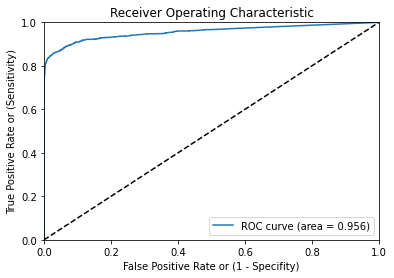

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
# Compute fpr, tpr, thresholds and roc auc
probs1 = clfrandom.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,probs1)
roc_auc = roc_auc_score(Y_test,probs1)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

## Resumen de los predictores de clasificación

In [43]:
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(Y_test, forest_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1812
           1       0.92      0.88      0.90      1384

    accuracy                           0.92      3196
   macro avg       0.92      0.91      0.91      3196
weighted avg       0.92      0.92      0.92      3196





# **XGBOOST**

In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
clfxg = XGBClassifier(max_depth = 4,n_estimators =1000)
clfxg.fit(X_train,Y_train)
pred_test =clfxg.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, pred_test)
pred_train = clfxg.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(Y_train,pred_train)

## Matriz de Confusión y curva ROC

In [45]:
predsxg = clfxg.predict(X_test)

In [46]:
print("AUC on Test data is " +str(roc_auc_score(Y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(Y_train,pred_train)))

AUC on Test data is 0.9605456239074124
AUC on Train data is 0.9878434637497386


In [47]:
probs = clfxg.predict_proba(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, predsxg)
print("\nMatriz de confusión: \n{}".format(cm))
 
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(Y_test,predsxg)))


Matriz de confusión: 
[[1749   63]
 [ 164 1220]]

Accuracy score: 
0.9289737171464331


In [49]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[0][1]
FP=cm[1][0]

In [50]:
sens = TP/(TP+FN)
sens

0.950896336710834

In [51]:
espc_1 =TN/(TN+FP)
espc_1

0.9142707788813382

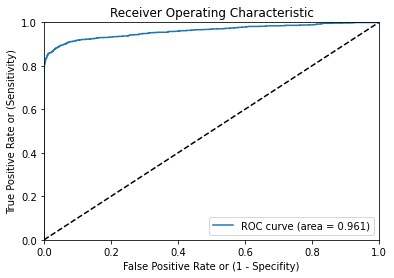

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
# Compute fpr, tpr, thresholds and roc auc
probs1 = clfxg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,probs1)
roc_auc = roc_auc_score(Y_test,probs1)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

## Resumen de los predictores de clasificación

In [53]:
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(Y_test, predsxg))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1812
           1       0.95      0.88      0.91      1384

    accuracy                           0.93      3196
   macro avg       0.93      0.92      0.93      3196
weighted avg       0.93      0.93      0.93      3196





# **ADABOOST**

In [54]:
from sklearn.ensemble import AdaBoostClassifier
clfada = AdaBoostClassifier(n_estimators = 1000)
clfada.fit(X_train,Y_train)
pred_test =clfada.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, pred_test)
pred_train = clfada.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(Y_train,pred_train)

## Matriz de Confusión y curva ROC

In [55]:
print("AUC on Test data is " +str(roc_auc_score(Y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(Y_train,pred_train)))

AUC on Test data is 0.9539635809439957
AUC on Train data is 0.9585049646572567


In [56]:
predsada = clfada.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, predsada)
print("\nMatriz de confusión: \n{}".format(cm))
 
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(Y_test,predsada)))


Matriz de confusión: 
[[1741   71]
 [ 230 1154]]

Accuracy score: 
0.905819774718398


In [58]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[0][1]
FP=cm[1][0]

In [59]:
sens = TP/(TP+FN)
sens

0.9420408163265306

In [60]:
espc_1 = TN/(TN+FP)
espc_1

0.8833079654997463

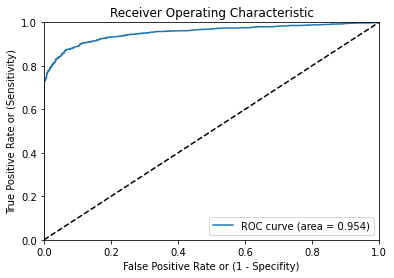

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
# Compute fpr, tpr, thresholds and roc auc
probs1 = clfada.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,probs1)
roc_auc = roc_auc_score(Y_test,probs1)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

## Resumen de los predictores de clasificación

In [62]:
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(Y_test, predsada))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1812
           1       0.94      0.83      0.88      1384

    accuracy                           0.91      3196
   macro avg       0.91      0.90      0.90      3196
weighted avg       0.91      0.91      0.90      3196



